In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import adjusted_rand_score, silhouette_score

### Датасет и его "причесывание"

In [2]:
iris = load_iris()
X, Y = iris.data, iris.target
X = StandardScaler().fit_transform(X)

### Проекция данных на двумерное пространство, используя t-SNE

In [3]:
graph_X = TSNE(n_components=2, random_state=42).fit_transform(X)

D:\Apps\Python\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
D:\Apps\Python\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


### Визуализация данных

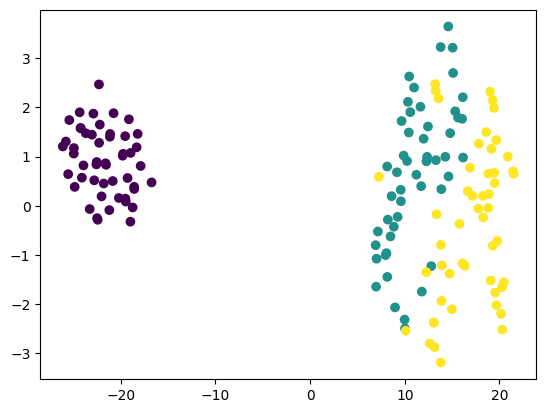

In [4]:
plt.scatter(graph_X[:, 0], graph_X[:, 1], c=Y)
plt.show()

### Алгоритм KMeans

In [5]:
kmeans_internal_scores, kmeans_external_scores = [], []
all_k = range(2, 11)
for k in all_k:
    labels = KMeans(n_clusters=k, random_state=42).fit_predict(X)

    filtered_X, filtered_Y, filtered_labels= [], [], []
    for i in range(len(labels)):
        if labels[i] != -1:
            filtered_X.append(X[i])
            filtered_Y.append(Y[i])
            filtered_labels.append(labels[i])

    clasters_count = len(np.unique(filtered_labels))
    if clasters_count < 2:
        continue

    kmeans_internal_scores.append(silhouette_score(filtered_X, filtered_labels))
    kmeans_external_scores.append(adjusted_rand_score(filtered_Y, filtered_labels))

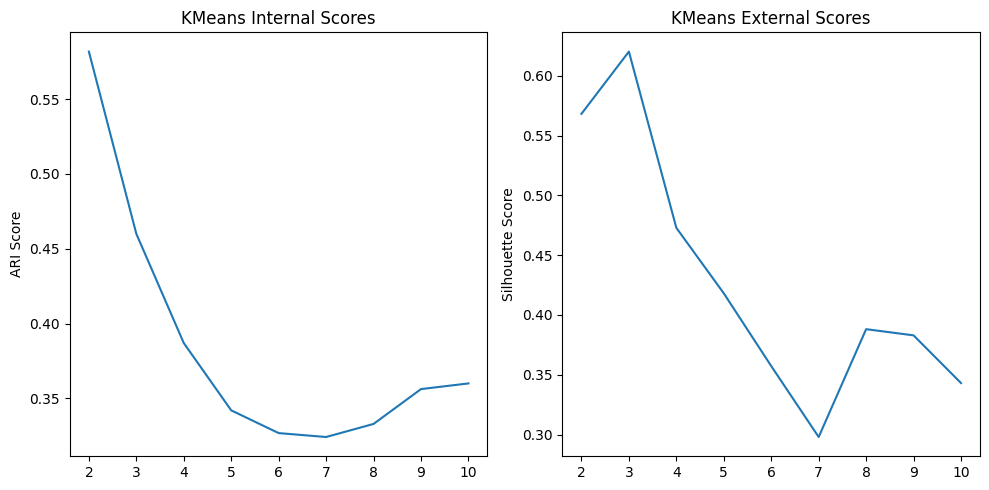

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].plot(all_k, kmeans_internal_scores)
ax[0].set_title("KMeans Internal Scores")
ax[0].set_ylabel("ARI Score")

ax[1].plot(all_k, kmeans_external_scores)
ax[1].set_title("KMeans External Scores")
ax[1].set_ylabel("Silhouette Score")

plt.tight_layout()
plt.show()

### Алгоритм DBSCAN

In [7]:
dbscan_internal_scores, dbscan_external_scores = {}, {}
all_eps = np.arange(0.1, 5.1, 0.1)
for eps in all_eps:
    labels = DBSCAN(eps=eps, min_samples=5).fit_predict(X)

    filtered_X, filtered_Y, filtered_labels= [], [], []
    for i in range(len(labels)):
        if labels[i] != -1:
            filtered_X.append(X[i])
            filtered_Y.append(Y[i])
            filtered_labels.append(labels[i])

    clasters_count = len(np.unique(filtered_labels))
    if clasters_count < 2:
        continue

    dbscan_internal_scores[clasters_count] = max(dbscan_internal_scores.get(clasters_count, 0), silhouette_score(filtered_X, filtered_labels))
    dbscan_external_scores[clasters_count] = max(dbscan_external_scores.get(clasters_count, 0), adjusted_rand_score(filtered_Y, filtered_labels))

dbscan_internal_scores, dbscan_external_scores = sorted(dbscan_internal_scores.items()), sorted(dbscan_external_scores.items())

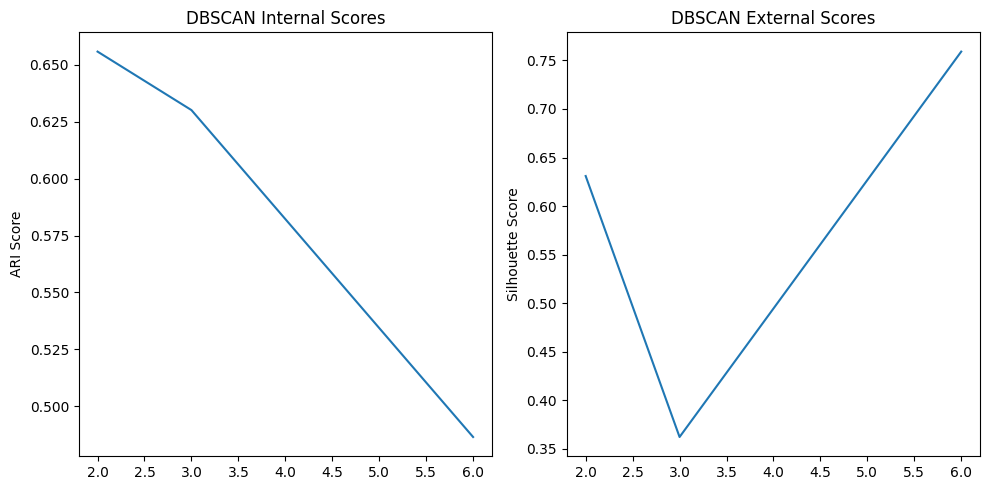

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].plot(*zip(*dbscan_internal_scores))
ax[0].set_title("DBSCAN Internal Scores")
ax[0].set_ylabel("ARI Score")

ax[1].plot(*zip(*dbscan_external_scores))
ax[1].set_title("DBSCAN External Scores")
ax[1].set_ylabel("Silhouette Score")

plt.tight_layout()
plt.show()